<a href="https://colab.research.google.com/github/SleepmodeRN/dataScience/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Framing

#ค่า pH ของไวน์มีผลต่อคุณภาพของไวน์หรือไม่ อย่างไร?

#Does the pH level of wine affect its quality, and if so, how?

# Data Acquisition

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/186/data.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Data Preparation




In [ ]:
# Handle Duplicate Data
df = df.drop_duplicates()
print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [ ]:
# identify missing values
print(df.isnull())
print(df.notnull())
# No missing data

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
4893          False             False        False           False      False   
4894          False             False        False           False      False   
4895          False             False        False           False      False   
4896          False             False        False           False      False   
4897          False             False        False           False      False   

      free_sulfur_dioxide  

In [ ]:
# Handling Incorrect Data Types

# Identifying Incorrect Data Types

# print the data types of each column
print(df.dtypes)

# All data types are Collect

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


<Axes: >

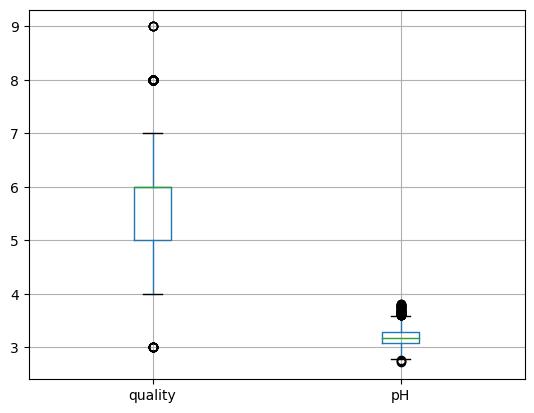

In [ ]:
# เราสนใจ pH และ quality จึงแสดง boxplot ของสองชนิดนี้

df.boxplot(column=['quality', 'pH'])

<Axes: >

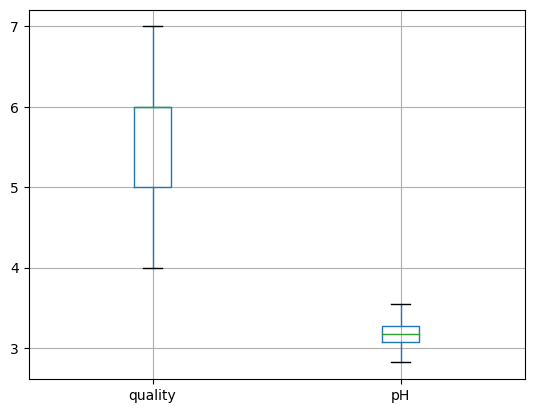

In [ ]:
# เราสนใจเฉพาะข้อมูล pH และ quality จึงกำจัด outliers สองชนิดนี้

#Quality

Q1_quality = df['quality'].quantile(0.25)
Q3_quality = df['quality'].quantile(0.75)

IQR_quality = Q3_quality - Q1_quality

lower_fence_quality = Q1_quality - 1.5 * IQR_quality
upper_fence_quality = Q3_quality + 1.5 * IQR_quality

#pH
Q1_pH = df['pH'].quantile(0.25)
Q3_pH = df['pH'].quantile(0.75)

IQR_pH = Q3_pH - Q1_pH

lower_fence_pH = Q1_pH - 1.5 * IQR_pH
upper_fence_pH = Q3_pH + 1.5 * IQR_pH

# กำจัด outliers
df = df[(df['quality'] >= lower_fence_quality) & (df['quality'] <= upper_fence_quality)]
df = df[(df['pH'] >= lower_fence_pH) & (df['pH'] <= upper_fence_pH)]



# พบว่า pH ยังคงมี outliers จึงกำจัดอีกรอบ

Q1_pH = df['pH'].quantile(0.25)
Q3_pH = df['pH'].quantile(0.75)

IQR_pH = Q3_pH - Q1_pH

lower_fence_pH = Q1_pH - 1.5 * IQR_pH
upper_fence_pH = Q3_pH + 1.5 * IQR_pH

df = df[(df['pH'] >= lower_fence_pH) & (df['pH'] <= upper_fence_pH)]


df.boxplot(column=['quality', 'pH'])


In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000
mean,6.868157,0.278816,0.334846,6.460232,0.046033,35.174968,138.713079,0.994090,3.180723,0.488941,10.470372,5.809008
std,0.827043,0.100221,0.121968,5.110617,0.022014,16.447711,42.247675,0.002987,0.139126,0.112343,1.213547,0.773946
min,4.400000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.820000,0.220000,8.000000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991800,3.080000,0.410000,9.400000,5.000000
50%,6.800000,0.260000,0.320000,5.300000,0.043000,34.000000,135.000000,0.993800,3.170000,0.470000,10.300000,6.000000
75%,7.400000,0.320000,0.390000,10.000000,0.050000,46.000000,168.000000,0.996200,3.270000,0.540000,11.300000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,138.500000,344.000000,1.038980,3.550000,1.080000,14.200000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3961 non-null   float64
 1   volatile_acidity      3961 non-null   float64
 2   citric_acid           3961 non-null   float64
 3   residual_sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free_sulfur_dioxide   3961 non-null   float64
 6   total_sulfur_dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [ ]:
#Mean
df.mean()

fixed_acidity             6.839346
volatile_acidity          0.280538
citric_acid               0.334332
residual_sugar            5.914819
chlorides                 0.045905
free_sulfur_dioxide      34.889169
total_sulfur_dioxide    137.193512
density                   0.993790
pH                        3.195458
sulphates                 0.490351
alcohol                  10.589358
quality                   5.854835
dtype: float64

In [ ]:
#median
df.median()

fixed_acidity             6.8000
volatile_acidity          0.2600
citric_acid               0.3200
residual_sugar            4.7000
chlorides                 0.0420
free_sulfur_dioxide      33.0000
total_sulfur_dioxide    133.0000
density                   0.9935
pH                        3.1800
sulphates                 0.4800
alcohol                  10.4000
quality                   6.0000
dtype: float64

In [ ]:
#Standard derivation
df.std()

fixed_acidity            0.866860
volatile_acidity         0.103437
citric_acid              0.122446
residual_sugar           4.861646
chlorides                0.023103
free_sulfur_dioxide     17.210021
total_sulfur_dioxide    43.129065
density                  0.002905
pH                       0.151546
sulphates                0.113523
alcohol                  1.217076
quality                  0.890683
dtype: float64

In [ ]:
#Skewness
df.skew()

fixed_acidity           0.696100
volatile_acidity        1.641081
citric_acid             1.310601
residual_sugar          1.333639
chlorides               4.969076
free_sulfur_dioxide     1.566680
total_sulfur_dioxide    0.456800
density                 1.273318
pH                      0.455457
sulphates               0.937853
alcohol                 0.450697
quality                 0.112004
dtype: float64

In [ ]:
#Kurtosis
df.kurt()

fixed_acidity            2.253047
volatile_acidity         5.327754
citric_acid              6.844808
residual_sugar           5.681512
chlorides               35.530288
free_sulfur_dioxide     13.434025
total_sulfur_dioxide     0.735258
density                 14.184892
pH                       0.549957
sulphates                1.565021
alcohol                 -0.695980
quality                  0.299345
dtype: float64

In [ ]:
# Covariance
df.cov()

#Covariance between pH and quality : 0.011260

# ค่า covariance นี้จะบอกถึงว่าเมื่อ pH เพิ่มขึ้น quality จะมีแนวโน้มที่จะเพิ่มแต่ก็ไม่มีผลอะไรมากหรือแทบไม่มีความสัมพันธ์กันเลยเนื่องจากค่าใกล้ศูนย์มาก

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,0.684000,-0.002366,0.029633,0.323132,0.000205,-0.634453,3.262997,0.000627,-0.045953,0.000133,-0.100552,-0.064552
volatile_acidity,-0.002366,0.010044,-0.001821,0.035208,0.000154,-0.161865,0.384540,0.000012,-0.000231,-0.000295,0.006483,-0.017428
citric_acid,0.029633,-0.001821,0.014876,0.057910,0.000325,0.209084,0.662311,0.000055,-0.002973,0.000898,-0.011735,-0.000478
residual_sugar,0.323132,0.035208,0.057910,26.118406,0.009037,27.125289,87.762011,0.012932,-0.128854,-0.007828,-2.826694,-0.391613
chlorides,0.000205,0.000154,0.000325,0.009037,0.000485,0.038895,0.175850,0.000016,-0.000290,0.000027,-0.009373,-0.003463
free_sulfur_dioxide,-0.634453,-0.161865,0.209084,27.125289,0.038895,270.527209,426.327990,0.015580,-0.040435,0.085453,-5.450124,0.197925
total_sulfur_dioxide,3.262997,0.384540,0.662311,87.762011,0.175850,426.327990,1784.866002,0.067340,-0.034730,0.645551,-23.410898,-5.380239
density,0.000627,0.000012,0.000055,0.012932,0.000016,0.015580,0.067340,0.000009,-0.000039,0.000026,-0.002809,-0.000681
pH,-0.045953,-0.000231,-0.002973,-0.128854,-0.000290,-0.040435,-0.034730,-0.000039,0.019356,0.001992,0.020040,0.011260
sulphates,0.000133,-0.000295,0.000898,-0.007828,0.000027,0.085453,0.645551,0.000026,0.001992,0.012621,-0.002244,0.005862


In [ ]:
#Correlation

df.corr()

# Correlation  between pH and quality : 0.104574

# ค่า Correlation ใกล์ศูนย์มากบ่งบอกถึงว่า pH และ quality ไม่มีผลอะไรมากหรือแทบไม่มีความสัมพันธ์กันเลย

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.028545,0.293765,0.076450,0.011286,-0.046641,0.093387,0.253808,-0.399374,0.001437,-0.100186,-0.100848
volatile_acidity,-0.028545,1.000000,-0.148933,0.068739,0.069727,-0.098195,0.090820,0.040279,-0.016593,-0.026227,0.053304,-0.224687
citric_acid,0.293765,-0.148933,1.000000,0.092905,0.121191,0.104224,0.128533,0.151170,-0.175202,0.065529,-0.079280,-0.005061
residual_sugar,0.076450,0.068739,0.092905,1.000000,0.080329,0.322697,0.406472,0.847026,-0.181224,-0.013635,-0.455773,-0.099009
chlorides,0.011286,0.069727,0.121191,0.080329,1.000000,0.107421,0.189080,0.242608,-0.094558,0.010873,-0.350868,-0.203231
free_sulfur_dioxide,-0.046641,-0.098195,0.104224,0.322697,0.107421,1.000000,0.613530,0.317079,-0.017670,0.046246,-0.273051,0.015548
total_sulfur_dioxide,0.093387,0.090820,0.128533,0.406472,0.189080,0.613530,1.000000,0.533555,-0.005909,0.136014,-0.456624,-0.164546
density,0.253808,0.040279,0.151170,0.847026,0.242608,0.317079,0.533555,1.000000,-0.093687,0.078807,-0.774890,-0.294404
pH,-0.399374,-0.016593,-0.175202,-0.181224,-0.094558,-0.017670,-0.005909,-0.093687,1.000000,0.127419,0.118696,0.104574
sulphates,0.001437,-0.026227,0.065529,-0.013635,0.010873,0.046246,0.136014,0.078807,0.127419,1.000000,-0.016457,0.067423
